60000 train samples
10000 test samples


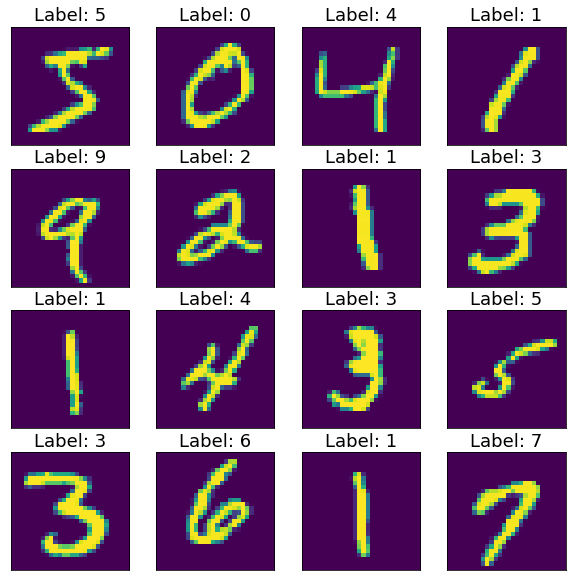

In [14]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255
X_test = X_test/255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

f, axs = plt.subplots(4, 4)
f.set_figheight(10)
f.set_figwidth(10)
for k in range(16):
    ax = axs[k // 4][k % 4]
    ax.set_title(f"Label: {y_train[k]}", fontsize=18)
    ax.imshow(X_train[k, :, :])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


X_train = X_train.reshape(-1, 28**2)
X_test = X_test.reshape(-1, 28**2)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


y_train = tf.keras.utils.to_categorical(y_train, 10) # one-hot vectors
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=2,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (60000,) (10000, 784) (10000,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 sampl

In [16]:
y_predict = model.predict_classes(X_test)

In [17]:
np.argmax(y_predict.reshape(-1) == y_test.reshape(-1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


0

In [20]:
y_test_labels = np.argmax(y_test, axis=1)

In [21]:
y_test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [24]:
np.argmax(y_predict != y_test_labels)

115

In [23]:
y_predict[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [25]:
y_test_labels[115]

4

In [26]:
y_predict[115]

9

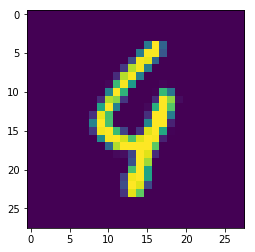

In [28]:
plt.imshow(X_test.reshape(-1, 28, 28)[115, :, :])
plt.show()

In [29]:
60000 % 128

96

In [30]:
60000//128

468

In [31]:
runs = ["HI", "MOM", "AWAY"]

In [32]:
lens = [len(s) for s in runs]

In [34]:
np.mean(lens)

3.0

In [35]:
np.max(lens)

4

In [36]:
np.sum(lens)

9

In [37]:
pd

NameError: name 'pd' is not defined